In [1]:
import os
import sys
sys.path.append("..")
import plotters
import reader
from DataTransformer import DataTransformer

%load_ext autoreload
%autoreload 2

os.chdir('../') # work from project root so the reader gets the right paths
print(os.getcwd())

c:\Users\aceas\Documents\School\Distributed Systems\plotterzz


In [2]:
data = reader.sort_dfs(["Min-Min",])
transformer = DataTransformer(data)

# ECDF for makespan

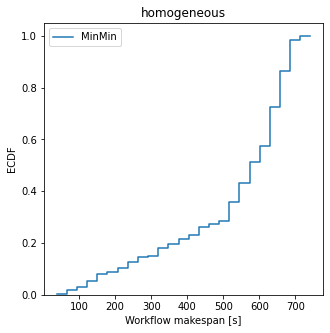

In [3]:
ecdf_data, ecdf_meta = transformer.to_makespan_cdf_per_environment("shell-parquet", "scale2", "exp_environment_ecdf.png")

plotters.create_makespan_cdf_order_policy(ecdf_data, ecdf_meta) # although created for exp 1, this works here just fine :)

# Electricity

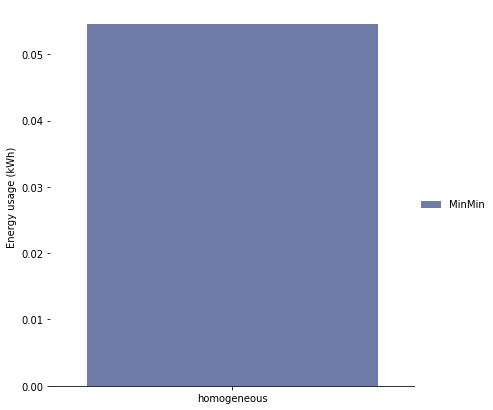

In [4]:
electricity_data, electricity_meta = transformer.to_energy_exp_environment("shell-parquet", "scale2","exp_env_electricity.png")

plotters.create_energy_plot_env(electricity_data, electricity_meta)

# Utilization

In [6]:
utilization_data, utilization_meta = transformer.to_utilization_table_environment("shell-parquet", "scale2", "exp_env_utilization.png")

utilization_data

,homogeneous
policy,
MinMin,0.724333


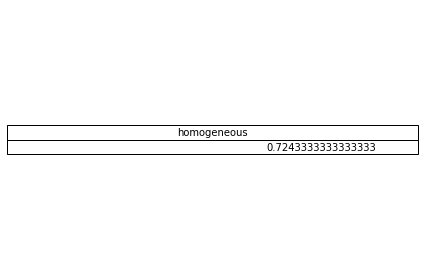

In [7]:
plotters.create_usage_table_per_env(utilization_data, utilization_meta)